In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
train = pd.read_csv('digit-recognizer/train.csv')
test = pd.read_csv('digit-recognizer/test.csv')

In [150]:
train.shape

(42000, 785)

In [151]:
test.shape

(28000, 784)

In [152]:
# Converting the datasets to np.ndarray for further calculations
train = np.array(train)
test = np.array(test)

In [153]:
train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [186]:
# Shuffle train
np.random.shuffle(train)
m,n = train.shape

# 20% -> 8400 for cross-validation
cv_data = train[:8400, :].T
cv_X = cv_data[1:, :]
cv_X = cv_X / 255.0
cv_y = cv_data[0, :]

# Remaining for training
train_train = train[8400:, :].T
train_X = train_train[1:, :]
train_X = train_X / 255.0
train_y = train_train[0, :]

In [187]:
train_X.shape

(784, 33600)

In [188]:
train_y.shape

(33600,)

In [189]:
train_y

array([1, 0, 4, ..., 8, 8, 4], dtype=int64)

In [190]:
def initialize_params():
    W1 = np.random.rand(10,784)-0.5
    b1 = np.random.rand(10,1)-0.5
    
    W2 = np.random.rand(10,10)-0.5
    b2 = np.random.rand(10,1)-0.5
    
    return W1, b1, W2, b2

In [204]:
def relu(Z):
    return np.maximum(Z,0)


def relu_deriv(Z):
    return Z > 0


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [192]:
def forward_prop(X, W1, b1, W2, b2):
    Z1 = W1@X + b1
    A1 = relu(Z1)
    
    Z2 = W2@A1 + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    
    return one_hot_Y


def backward_prop(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    yo = one_hot(Y)
    dZ2 = A2 - yo
    dW2 = (1/m)*(dZ2@A1.T)
    dB2 = (1/m)*(np.sum(dZ2))
    
    dZ1 = (W2.T@dZ2) * (relu_deriv(Z1))
    dW1 = (1/m)*(dZ1@X.T)
    dB1 = (1/m)*(np.sum(dZ1))
    
    return dW2, dB2,  dW1, dB1


def update_params(W1, b1, W2, b2, dW2, dB2, dW1, dB1, alpha=0.1):
    W2 -= alpha*(dW2)
    b2 -= alpha*(dB2)
    
    W1 -= alpha*(dW1)
    b1 -= alpha*(dB1)
    
    return W1, b1, W2, b2

def get_accuracy(predictions, Y):
    print(f'Predictions: {predictions}')
    print(f'Actual: {Y}')
    return np.sum(predictions == Y) / Y.size


def get_predictions(A2):
    return np.argmax(A2, 0)

In [193]:
def train_model(X, Y, iterations=500, alpha=0.1):
    W1, b1, W2, b2 = initialize_params()
    for i in range(iterations + 1):
        Z1, A1, Z2, A2 = forward_prop(X, W1, b1, W2, b2)
        dW2, dB2,  dW1, dB1 = backward_prop(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW2, dB2, dW1, dB1, alpha)
        
        if i%10 == 0:
            print(f'Iteration: {i}')
            predictions = get_predictions(A2)
            print(f'Accuracy: {get_accuracy(predictions, Y)}')
    
    return W1, b1, W2, b2

In [194]:
W1, b1, W2, b2 = train_model(train_X, train_y)

Iteration: 0
Predictions: [4 5 4 ... 2 5 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.12160714285714286
Iteration: 10
Predictions: [4 0 4 ... 6 1 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.21833333333333332
Iteration: 20
Predictions: [1 0 4 ... 0 1 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.30782738095238094
Iteration: 30
Predictions: [1 0 4 ... 0 8 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.3689880952380952
Iteration: 40
Predictions: [1 0 4 ... 0 8 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.41604166666666664
Iteration: 50
Predictions: [1 0 4 ... 0 8 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.4555059523809524
Iteration: 60
Predictions: [1 0 4 ... 0 8 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.4963690476190476
Iteration: 70
Predictions: [1 0 4 ... 0 8 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.535625
Iteration: 80
Predictions: [1 0 4 ... 0 8 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.5689583333333333
Iteration: 90
Predictions: [1 0 4 ... 0 6 4]
Actual: [1 0 4 ... 8 8 4]
Accuracy: 0.5964880952380952
Iterati

In [195]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = train_X[:, index, None]
    prediction = make_predictions(train_X[:, index, None], W1, b1, W2, b2)
    label = train_y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


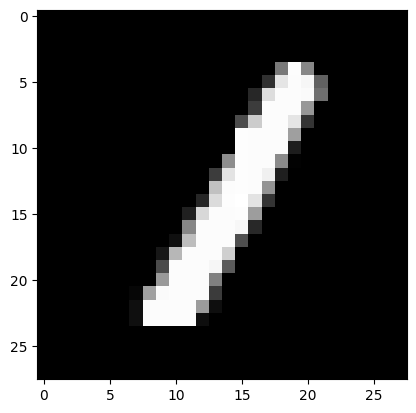

Prediction:  [0]
Label:  0


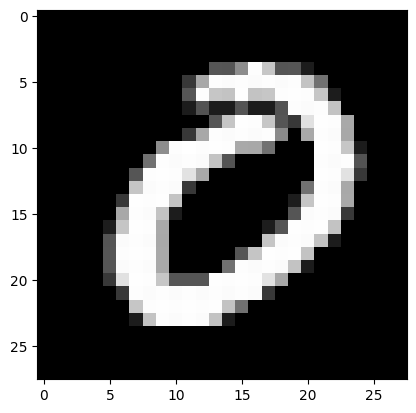

Prediction:  [4]
Label:  4


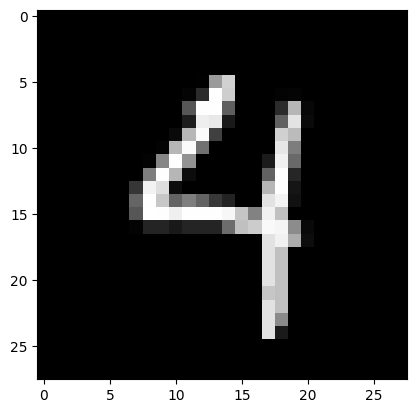

Prediction:  [1]
Label:  1


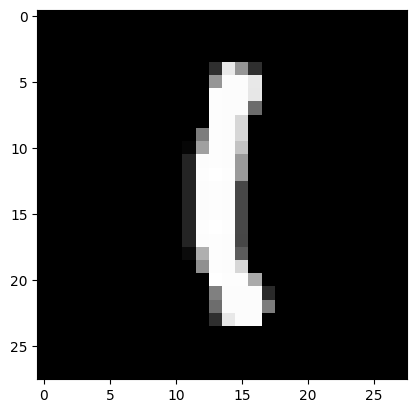

Prediction:  [0]
Label:  0


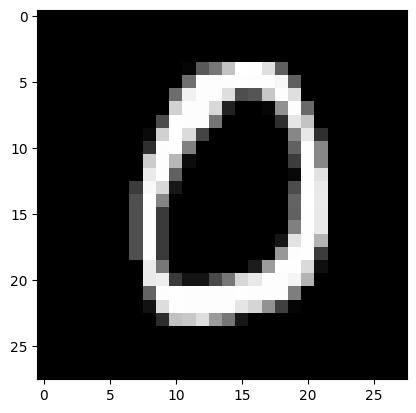

Prediction:  [5]
Label:  5


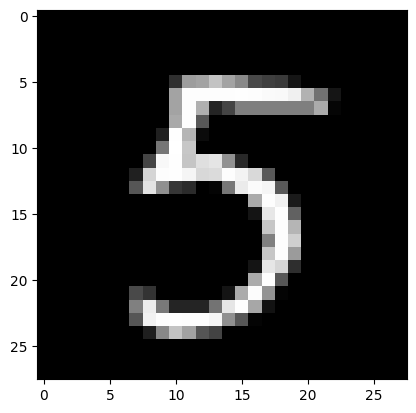

Prediction:  [6]
Label:  6


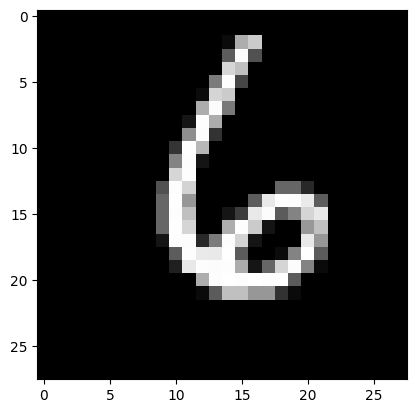

Prediction:  [2]
Label:  2


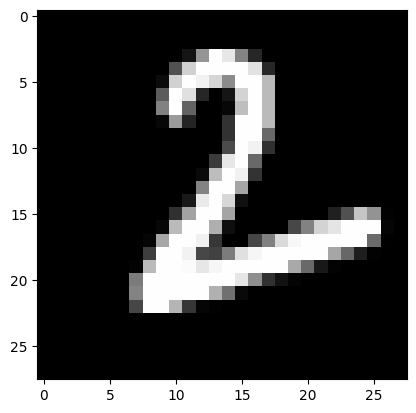

Prediction:  [4]
Label:  4


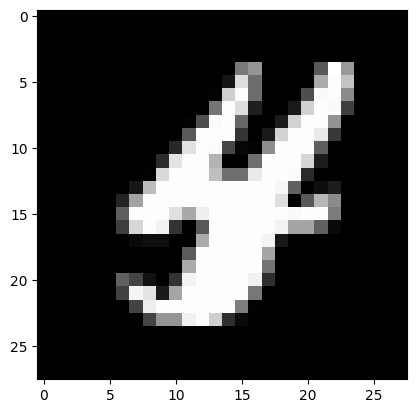

Prediction:  [9]
Label:  4


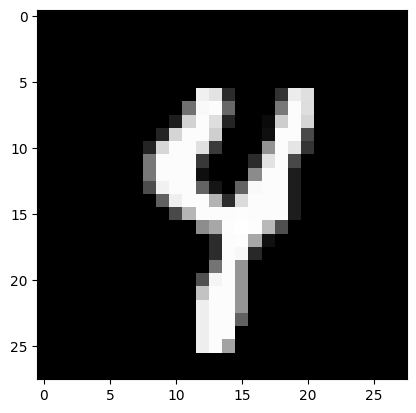

In [196]:
for i in range(10):
    test_prediction(i, W1, b1, W2, b2)

In [197]:
# Predicting from cross_validation data-set
cv_preds = make_predictions(cv_X, W1, b1, W2, b2)
get_accuracy(cv_preds, cv_y)

Predictions: [4 1 9 ... 1 1 0]
Actual: [2 1 9 ... 1 1 0]


0.8398809523809524

In [199]:
train_X.shape

(784, 33600)

In [198]:
test.T.shape

(784, 28000)

In [205]:
y_test = make_predictions(test.T, W1, b1, W2, b2)

C:\Users\bholu\AppData\Local\Temp\ipykernel_17696\3825879663.py:10: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\bholu\AppData\Local\Temp\ipykernel_17696\3825879663.py:10: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


In [207]:
submission = pd.DataFrame({'ImageId': range(1, test.shape[0] + 1), 'Label': y_test})
submission.to_csv('submission.csv', index=False)